## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

/Users/dpham/Desktop/env/lib/python2.7/site-packages/sklearn/utils/__init__.py:12: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/Users/dpham/Desktop/env/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:14: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._hashing import transform as _hashing_transform
/Users/dpham/Desktop/env/lib/python2.7/site-packages/sklearn/utils/extmath.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/Users/dpham/Desktop/env/lib/python2.7/site-packages/sklearn/utils/extmath.py:25: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms
/Users/dpham/Desktop/env/lib/python2.7/site-packages/sklearn/uti

## Look at the histograms for the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1106fb710>,
      dtype=object)

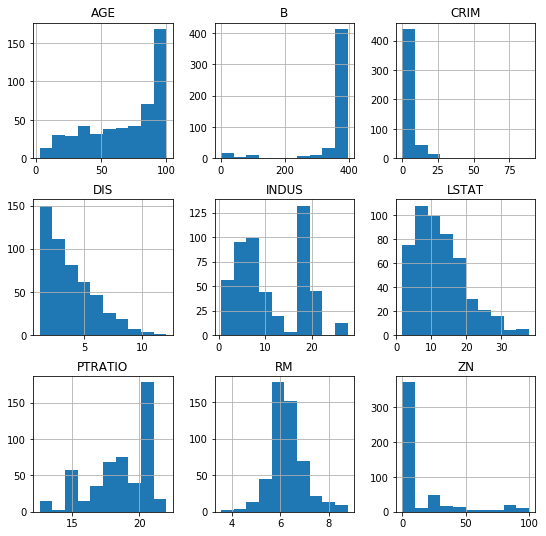

In [5]:
boston_cont = boston_features.copy()
boston_cont = boston_cont[boston_cont.columns.drop(list(boston_cont.filter(regex='TAX')))]
boston_cont = boston_cont[boston_cont.columns.drop(list(boston_cont.filter(regex='RAD')))]
boston_cont= boston_cont.drop(['CHAS'], axis=1)
boston_cont.hist(figsize  = [9, 9])

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

/Users/dpham/Desktop/env/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


ValueError: supplied range of [-inf, 4.60517018599] is not finite

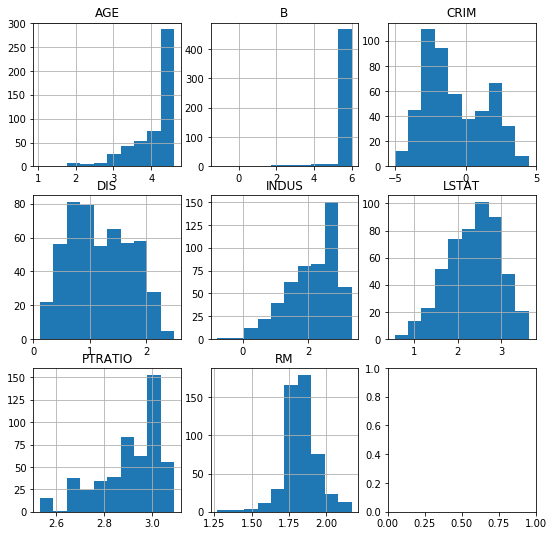

In [9]:
import numpy as np
normal = pd.DataFrame([])
normal["AGE"] = np.log(boston_cont["AGE"])
normal["B"] = np.log(boston_cont["B"])
normal["CRIM"] = np.log(boston_cont["CRIM"])
normal["DIS"] = np.log(boston_cont["DIS"])
normal["INDUS"] = np.log(boston_cont["INDUS"])
normal["LSTAT"] = np.log(boston_cont["LSTAT"])
normal["PTRATIO"] = np.log(boston_cont["PTRATIO"])
normal["RM"] = np.log(boston_cont["RM"])
normal["ZN"] = np.log(boston_cont["ZN"])
normal.hist(figsize  = [9, 9])

In [11]:
normal["ZN"] = np.log(boston_cont["ZN"])
normal["ZN"].describe()

/Users/dpham/Desktop/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    506.000000
mean           -inf
std             NaN
min            -inf
25%            -inf
50%            -inf
75%        2.525729
max        4.605170
Name: ZN, dtype: float64

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

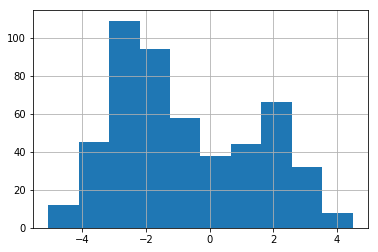

In [14]:
logcrim.hist()

In [15]:
(logcrim-min(logcrim))/(max(logcrim)-min(logcrim))

0      0.000000
1      0.153211
2      0.153134
3      0.171005
4      0.250315
5      0.162521
6      0.276046
7      0.327656
8      0.367371
9      0.344658
10     0.373926
11     0.305940
12     0.282362
13     0.481724
14     0.483078
15     0.481329
16     0.535631
17     0.504684
18     0.507126
19     0.496582
20     0.553642
21     0.513370
22     0.552013
23     0.528914
24     0.500052
25     0.511947
26     0.488506
27     0.525396
28     0.503177
29     0.530388
         ...   
476    0.695890
477    0.813789
478    0.773591
479    0.808870
480    0.714587
481    0.712484
482    0.712905
483    0.638603
484    0.620842
485    0.666348
486    0.712182
487    0.695119
488    0.332129
489    0.352559
490    0.365481
491    0.294927
492    0.300311
493    0.346652
494    0.396710
495    0.350028
496    0.400400
497    0.392434
498    0.380349
499    0.349348
500    0.373688
501    0.240099
502    0.206118
503    0.236926
504    0.298671
505    0.210954
Name: CRIM, Length: 506,

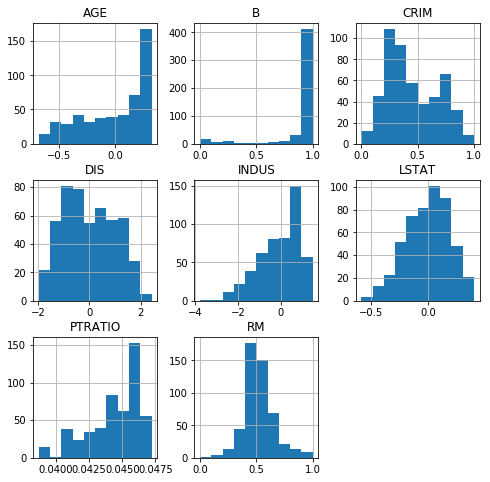

In [13]:
age = boston_cont["AGE"]
b = boston_cont["B"]
rm = boston_cont["RM"]
logcrim = normal["CRIM"] 
logdis = normal["DIS"]  
logindus = normal["INDUS"] 
loglstat = normal["LSTAT"]
logptratio = normal["PTRATIO"]

features_final= pd.DataFrame([])

features_final["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final["B"] = (b-min(b))/(max(b)-min(b))
features_final["RM"] = (rm-min(rm))/(max(rm)-min(rm))
features_final["DIS"]   = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final["LSTAT"] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final["AGE"] = (age-np.mean(age))/(max(age)-min(age))
features_final["PTRATIO"] = (logptratio)/(np.linalg.norm(logptratio))

features_final.hist(figsize  = [8, 8]);

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.